In [1]:
import pandas as pd #convenetional way

In [3]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0) #Save the results to data

data.head() #Display first 5 rows

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.shape

(200, 4)

Features:
* TV: advertising money spent on TV for a single product in a given market (thousands of dollars)
* Radio: Advertising money spent on radio
* Newspaper: Advertising money spent on Newspaper

Response:

* Sales: Sales of a single product in a given market (in thousands of items)

What else?

* Because the response variable is continuous, this is a regression problem
* There are 200 obvervations (rows), and each observation is a single market

In [9]:
import seaborn as sns #conventional way to import seaborn

%matplotlib inline

#let plots be shown within notebook

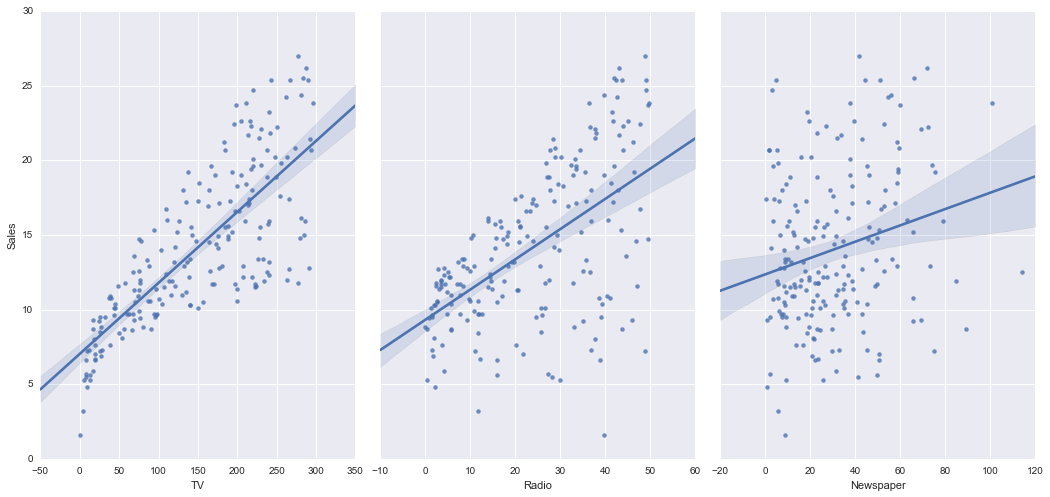

In [13]:
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", size=7, aspect=0.7, kind='reg')
# Band shown is 95% confidence
# Since there is a linear relationship, a linear regression is a good choice

\***Difference between regression and linear regression**\*

Regression is a type of supervised learning in which the response is continuous. Linear regression is a type of model that can used to be solved regression problems that happens to have similar words.

## Linear Regression

* **Pros: ** fast, no tuning (like the K value in KNN), highly interpretable, well-understood
* **Cons: ** unlikely to produce the best accuracy (assuming a linear relationship between features and response)

### Forms of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

* y is the response (sales in this case)
* $\beta_0$ is the intercept (y when all x values are 0)
* $\beta_1$ is the coefficient for $x_1$ (the first feature)
* $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this specific case, $y = \beta_0 + \beta_1\times TV + \beta_2 \times Radio + \beta_3\times Newspaper$

The $\beta$ values are called **model coefficients** and are learned during the model fitting process using the "least square" criterion. This fitted model is what is used to make predictions.

The least square criterion tries to find the line that minizes the sum of the squared errors (vertical distances between data points in lines).

# Preparing x and y using pandas

* scikit-learn expects x (the matrix containing observations and features) and y (response vector) to be NumPy arrays
* However, pandas is built on top of NumPy
* So, x can be a pandas DataFrame and y can be a pandas Series

In [14]:
feature_cols = ["TV", "Radio", "Newspaper"]

x = data[feature_cols] #Same as x = data[["TV", "Radio", "Newspaper"]]
                       #Tells pandas to select a subset of dataset columns of the arra passed
x.head() #Only the columns we want

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [15]:
y = data["Sales"] # This makes y a series instead of a subset of a DataFrame
                  # Same as y = data.Sales (if no spaces)
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [17]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #Default is 75% training 25% testing

In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train) #This sets the beta coefficients to the equation above

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [20]:
zip(feature_cols, linreg.coef_) #Pairs the feature name (TV, Radio, Newspaper) with corresponding coefficient

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111803788)]

$y = 2.88 + 0.0466\times TV + 0.179\times Radio + 0.00345\times Newspaper$

### How do we interpret coefficients?
* For a given amount of spending in total, a unit increase in spending in that feature $n$ corresponds to a $\beta_n$ unit increase in sales
* Specifically, for a given amount of spending, an additional \\$1,000 spent on TV is associated with $\beta_{TV}$ or 46.6 additional sales.

#### Notes:

* This is assocation, not causation
* If an increase in TV spending was **associated** with a decrease in sales, $\beta_{TV}$ would be negative


In [21]:
#Making predictions
y_pred = linreg.predict(x_test)

# Model Evaluation Metrics For Regression

Evaluation metrics used for classification problems (like accuracy) are not helpful for regression problems. Instead we need new metrics designed for comparing continuous values

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac{1}{n}\sum_{i=1}^n\mid y_i-\hat{y_i}\mid$$

**Mean Square Error** (MSE) is the mean of the squared errors:

$$\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors (the equation above)

$$\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2}$$

In [24]:
#Defining true and predicted values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

#MAE by hand
print (10+0+20+10)/4
#MAE with scikit-learn
from sklearn import metrics
print metrics.mean_absolute_error(true, pred)
print "-------------------"
#MSE by hand
print (10**2+0**2+20**2+10**2)/4
print metrics.mean_squared_error(true, pred) #and with scikit-learn
print "-------------------"
#RMSE next
import numpy as np
print np.sqrt((10**2+0**2+20**2+10**2)/4.)
print np.sqrt(metrics.mean_squared_error(true, pred))

10
10.0
-------------------
150
150.0
-------------------
12.2474487139
12.2474487139


## Comparing these metrics
 * **MAE** is the easiest to understand; it's the average error
 * **MSE** is even mroe popular because MSE "punishes" larger errors (squaring it)
 * **RMSE** is even more popular because the output error is in the same units (it is interpretable)

So we'll computer the RMSE for the sales prediction

In [25]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


Linear regression doesn't have any tuning parameters, but we can choose which features to include when training the model. From the graphs (way) above, TV has a weak correlation, so we can remove that and make a new model, and see how the RMSE compares.

In [27]:
feature_cols = ["TV", "Radio"]

x = data[feature_cols] #subset of original pandas DataFrame

y = data.Sales #Series of the DataFrame

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #RMSE error

#Since we want to minimize error, a lower RMSE value is good, so the newspaper feature should be removed from the model

1.38790346994
